In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pprint import pprint
import re
import os
import glob
from bs4 import BeautifulSoup
import requests
%matplotlib inline
from sklearn import metrics
import numpy as np
import unicodedata
import time

/Users/samsisto/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
#yelp data line breaks:
#130873
#460945

In [2]:
path = '/Users/samsisto/Desktop/Yelp Users/yelp_users.json'
path2 = '/Users/samsisto/Desktop/Yelp Business/yelp_businesses.json'
path3 = '/Users/samsisto/Desktop/Yelp Reviews/yelp_reviews.json'

data = []
with open(path) as f:
    for line in f:
        data.append(json.loads(line))
users = pd.DataFrame(data)

data = []
with open(path2) as f:
    for line in f:
        data.append(json.loads(line))
business = pd.DataFrame(data)

data = []
with open(path3) as f:
    for line in f:
        data.append(json.loads(line))
reviews = pd.DataFrame(data)

In [83]:
#business.schools

#objs = [df, pd.DataFrame(df['lists'].tolist()).iloc[:, :2]]
#pd.concat(objs, axis=1).drop('lists', axis=1)

#new_business = [business, pd.DataFrame(business['schools'].tolist()).iloc[:, :2]]
pd.DataFrame(business['schools'].tolist()).iloc[:]
newest_bus = pd.concat(new_business, axis=1).drop('schools', axis=1)

#business.state.value_counts().plot(kind="bar")

#business.schools.value_counts().plot(kind="bar")

y = sns.countplot(x='state', data=business, orient = "v")
y.set_title('Yelp Business Counts by State')
#y.set(xlabel='Content Rating', ylabel='Count')

#sns.boxplot(x='review_count', y='state', data=business)
x = sns.barplot(x='stars', y=0, data=newest_bus)
x.set_title('Mean Star Rating for 250 Nearest Businesses by College')
x.set(xlabel='Mean Star Rating', ylabel='Colleges')

#newest_bus.groupby(0).stars.mean()

,0,1
0,University of Southern California,None
1,Massachusetts Institute of Technology,Harvard University
2,University of Waterloo,None
3,Purdue University,None
4,University of Texas - Austin,None
5,Georgia Institute of Technology,None
6,Princeton University,None
7,Rensselaer Polytechnic Institute,None
8,University of Pennsylvania,None
9,Rice University,None


In [3]:
reviews_business = pd.merge(reviews, business, on='business_id', suffixes=('_review','_business'))
yelp = pd.merge(reviews_business, users, on='user_id')

In [4]:
yelp.columns.values
#yelp['name_y'].head(10)

array([u'business_id', u'date', u'review_id', u'stars_review', u'text',
       u'type_review', u'user_id', u'votes_x', u'categories', u'city',
       u'full_address', u'latitude', u'longitude', u'name_x',
       u'neighborhoods', u'open', u'photo_url', u'review_count_x',
       u'schools', u'stars_business', u'state', u'type_business', u'url_x',
       u'average_stars', u'name_y', u'review_count_y', u'type', u'url_y',
       u'votes_y'], dtype=object)

In [4]:
yelp=yelp.rename(columns = {'votes_x':'review_votes', 'name_x':'business_name', 'review_count_x':'business_review_cnt'})
yelp=yelp.rename(columns = {'url_x':'business_url', 'name_y':'reviewer_name', 'review_count_y':'user_review_cnt'})
yelp=yelp.rename(columns = {'votes_y':'user_votes', 'url_y':'user_url'})

In [5]:
def strip_votes(df, desired_col):
    funny,useful,cool = [],[],[]
    for instance in df[desired_col]:
        funny.append(instance[u'funny'])
        useful.append(instance[u'useful'])
        cool.append(instance[u'cool'])
    
    votes = pd.DataFrame([funny,useful,cool]).T
    df = pd.merge(df, votes, left_index=True, right_index=True)
    return df

In [6]:
yelp = strip_votes(yelp, 'review_votes')
yelp = strip_votes(yelp, 'user_votes')
yelp

,business_id,date,review_id,stars_review,text,type_review,user_id,review_votes,categories,city,...,user_review_cnt,type,user_url,user_votes,0_x,1_x,2_x,0_y,1_y,2_y
0,wbpbaWBfU54JbjLIDwERQA,2009-06-09,0xuZfa0t4MNWd3eIFF02ug,5,I'm a fan of soft serve ice cream and Guptill'...,review,kT43SxDgMGzbeXpO51f0hQ,"{u'funny': 0, u'useful': 0, u'cool': 1}","[Food, Ice Cream & Frozen Yogurt]",Cohoes,...,9,user,http://www.yelp.com/user_details?userid=kT43Sx...,"{u'funny': 0, u'useful': 4, u'cool': 2}",0,0,1,0,4,2
1,hzekNMhUDUlVGLH1fauB9A,2009-10-06,p7VGBYQcCQxbxWrFw7ooLQ,4,"Based on the positive reviews here, my fiance ...",review,kT43SxDgMGzbeXpO51f0hQ,"{u'funny': 0, u'useful': 0, u'cool': 0}","[Sushi Bars, Japanese, Restaurants]",Latham,...,9,user,http://www.yelp.com/user_details?userid=kT43Sx...,"{u'funny': 0, u'useful': 4, u'cool': 2}",0,0,0,0,4,2
2,wbpbaWBfU54JbjLIDwERQA,2009-08-30,rHyUssu5rYZoRliaUcHrvg,5,"A few days ago, my girlfriends took me here. T...",review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 3, u'useful': 3, u'cool': 2}","[Food, Ice Cream & Frozen Yogurt]",Cohoes,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",3,3,2,2777,3251,2707
3,o0WYo6-P0PRdShWYGDazZQ,2010-06-03,AZ7n1vn1wSFVwkftDRFOmA,4,"I'm not really a beer drinker. And when I am, ...",review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 1, u'useful': 1, u'cool': 2}","[Bars, Food, Breweries, Pubs, Nightlife, Ameri...",Troy,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",1,1,2,2777,3251,2707
4,M0o9CXzYH_k6vgG-0vVkVw,2011-09-04,fg2ivTGzJcG4KUjOBxs7Dw,5,My dreams of neverending sushi have finally be...,review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 0, u'useful': 4, u'cool': 2}","[Bars, Sushi Bars, Japanese, Nightlife, Lounge...",Latham,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",0,4,2,2777,3251,2707
5,8uJwnr_xwgJ-bTPTXm9SzA,2012-01-28,jJtcmoVAhhbgKDME9qO6JA,2,"I really, really, really hate to renege what I...",review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 0, u'useful': 4, u'cool': 1}","[Nail Salons, Beauty and Spas]",Latham,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",0,4,1,2777,3251,2707
6,7VkQeZ-xbyq0b1UWema6KA,2010-06-13,rotrpK_BVv6TYWBsqkNSXw,5,"Such a fantastic, hidden away little gem of a ...",review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 1, u'useful': 4, u'cool': 3}","[Pubs, Bars, Sports Bars, Nightlife]",Watervliet,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",1,4,3,2777,3251,2707
7,iOYrrlk8yOelEaXDsbJIVQ,2009-08-24,3ouyYIgDSrYR8yl-_5LQjQ,4,"Call me un-American, or maybe just un-Eastern ...",review,sw-vrx-GT5fMXm77gjck7w,"{u'funny': 3, u'useful': 6, u'cool': 4}","[Delis, Restaurants, Event Planning & Services...",Albany,...,558,user,http://www.yelp.com/user_details?userid=sw-vrx...,"{u'funny': 2777, u'useful': 3251, u'cool': 2707}",3,6,4,2777,3251,2707
8,wbpbaWBfU54JbjLIDwERQA,2009-06-18,JOpxKYBk-OaEpS62R2eE_w,4,I've been to Guptill's twice. The first time I...,review,3viH_SSb9QhrCbifTbx0Ng,"{u'funny': 0, u'useful': 1, u'cool': 0}","[Food, Ice Cream & Frozen Yogurt]",Cohoes,...,156,user,http://www.yelp.com/user_details?userid=3viH_S...,"{u'funny': 55, u'useful': 130, u'cool': 42}",0,1,0,55,130,42
9,YFkrZhuA1phCiJB1EJV39w,2007-12-06,WM4-d4SroGhWje1hE2bLMA,5,Hands down my favorite place to see bands in t...,review,3viH_SSb9QhrCbifTbx0Ng,"{u'funny': 0, u'useful': 2, u'cool': 2}","[Bars, Music Venues, Arts & Entertainment, Mid...",Cambridge,...,156,user,http://www.yelp.com/user_details?userid=3viH_S...,"{u'funny': 55, u'useful': 130, u'cool': 42}",0,2,2,55,130,42


In [5]:
funny,useful,cool = [],[],[]
funny2,useful2,cool2 = [],[],[]
for review_votes in yelp['review_votes']:
    funny.append(review_votes[u'funny'])
    useful.append(review_votes[u'useful'])
    cool.append(review_votes[u'cool'])
    
for user_votes in yelp['user_votes']:
    funny2.append(user_votes[u'funny'])
    useful2.append(user_votes[u'useful'])
    cool2.append(user_votes[u'cool'])
df = pd.DataFrame([funny,useful,cool,funny2,useful2,cool2]).T

In [8]:
yelp = pd.merge(yelp, df, left_index=True, right_index=True)

NameError: name 'df' is not defined

In [7]:
yelp.rename(columns = {'0_x':'review_votes_funny', '1_x':'review_votes_useful', '2_x':'review_votes_cool'}, inplace=True)
yelp.rename(columns = {'0_y':'user_votes_funny', '1_y':'user_votes_useful', '2_y':'user_votes_cool'}, inplace=True)
yelp.drop('type_review', axis=1, inplace=True)
yelp.drop('type_business', axis=1, inplace=True)

In [65]:
texas = yelp[yelp.state.isin(['TX'])]

In [86]:
print reviews.columns.values

[u'business_id' u'date' u'review_id' u'stars' u'text' u'type' u'user_id'
 u'votes']


In [84]:
business.columns.values

array([u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'photo_url', u'review_count', u'schools', u'stars', u'state',
       u'type', u'url'], dtype=object)

In [85]:
users.columns.values

array([u'average_stars', u'name', u'review_count', u'type', u'url',
       u'user_id', u'votes'], dtype=object)

In [66]:
texas.head(50)

,business_id,date,review_id,stars_review,text,user_id,review_votes,categories,city,full_address,...,user_review_cnt,type,user_url,user_votes,review_votes_funny,review_votes_useful,review_votes_cool,user_votes_funny,user_votes_useful,user_votes_cool
1168,1QasX9aZjmvRBxVB47K6vw,2010-09-06,96ATPygsJhVwtiKdSMLDcw,3,A toy obsessed colleague and I were tramping a...,-iLH3Q2Wg4AMrNUXcgvliA,"{u'funny': 1, u'useful': 3, u'cool': 1}","[Food, Ice Cream & Frozen Yogurt, Shopping, To...",Austin,"2900 Guadalupe St\nWest Campus\nAustin, TX 78705",...,1269,user,http://www.yelp.com/user_details?userid=-iLH3Q...,"{u'funny': 1985, u'useful': 3472, u'cool': 2458}",1,3,1,1985,3472,2458
1201,k_meGDP6Oec4IGB4z4b5Eg,2010-04-11,SaWUPuTV9C3g19s8SIFSew,4,I had so much effing fun in this place on my a...,-iLH3Q2Wg4AMrNUXcgvliA,"{u'funny': 1, u'useful': 2, u'cool': 1}","[Women's Clothing, Used, Vintage & Consignment...",Austin,"2532 Guadalupe St\nThe Drag\nAustin, TX 78705",...,1269,user,http://www.yelp.com/user_details?userid=-iLH3Q...,"{u'funny': 1985, u'useful': 3472, u'cool': 2458}",1,2,1,1985,3472,2458
1264,sUv1YTAiTWwDJCB-dGPVoQ,2010-04-01,CVBqIKJXlOy5BqMvYCcoRg,5,I kept seeing this BX pop up in reviews and bl...,-iLH3Q2Wg4AMrNUXcgvliA,"{u'funny': 0, u'useful': 2, u'cool': 1}","[Used, Vintage & Consignment, Fashion, Shopping]",Austin,2904 Guadalupe St\nUniversity of Texas\nAustin...,...,1269,user,http://www.yelp.com/user_details?userid=-iLH3Q...,"{u'funny': 1985, u'useful': 3472, u'cool': 2458}",0,2,1,1985,3472,2458
1490,I1y3BOxQLqIFZYoOnrisSA,2012-07-13,zPAPPE2FNaWxsSft9bOc1A,5,CHOC CHIP COOKIE SANDWHICH WITH WHITE FROSTING...,PgUb99KUCCq8KffNniQRSg,"{u'funny': 0, u'useful': 0, u'cool': 0}","[Food, Bakeries, Desserts]",Austin,"1901 Rio Grande\nWest Campus\nAustin, TX 78705",...,39,user,http://www.yelp.com/user_details?userid=PgUb99...,"{u'funny': 10, u'useful': 29, u'cool': 9}",0,0,0,10,29,9
1736,fL_ilXgNUq_j9vMpZwdcLg,2009-09-09,nODvcSg-kKv2cM7gpEkXJg,4,I had the best Tex-Mex brunch at Trudy's that ...,9wdnwfSDDKIW1fYaRHm4bw,"{u'funny': 0, u'useful': 0, u'cool': 0}","[Nightlife, Bars, Tex-Mex, Restaurants]",Austin,"409 W 30th St\nUniversity of Texas\nAustin, TX...",...,57,user,http://www.yelp.com/user_details?userid=9wdnwf...,"{u'funny': 5, u'useful': 41, u'cool': 16}",0,0,0,5,41,16
1900,hTp23z3Q5PCvuGvKTIQtXw,2006-10-24,7I0BRjAxicUn6662hpyplA,3,this place is pretty decent and cheap. my boyf...,6a-782Y5FXqJ7KGmQtJsSQ,"{u'funny': 1, u'useful': 2, u'cool': 1}","[Food, Thai, Coffee & Tea, Restaurants]",Austin,"2514 Guadalupe St\nThe Drag\nAustin, TX 78705",...,606,user,http://www.yelp.com/user_details?userid=6a-782...,"{u'funny': 395, u'useful': 1091, u'cool': 603}",1,2,1,395,1091,603
1993,1QasX9aZjmvRBxVB47K6vw,2012-06-19,m_haHtSKZVwtz9b2Wf2iWw,3,Toy Joy is a pretty hip spot. I think I was a...,ry6c6-WVzVM88wsNMxCsFA,"{u'funny': 1, u'useful': 1, u'cool': 1}","[Food, Ice Cream & Frozen Yogurt, Shopping, To...",Austin,"2900 Guadalupe St\nWest Campus\nAustin, TX 78705",...,76,user,http://www.yelp.com/user_details?userid=ry6c6-...,"{u'funny': 67, u'useful': 126, u'cool': 86}",1,1,1,67,126,86
2385,TuPliHI_pmNQa9ve2iXfFA,2006-07-21,gjMJjbcLbWeqOeCBhDhw-g,4,Like joining a Thai family! We went there dur...,ezJj-pxd6dWJ4C3MT3JTzQ,"{u'funny': 0, u'useful': 0, u'cool': 0}","[Thai, Restaurants]",Houston,"6710 Morningside Dr\nWest University\nHouston,...",...,163,user,http://www.yelp.com/user_details?userid=ezJj-p...,"{u'funny': 149, u'useful': 241, u'cool': 177}",0,0,0,149,241,177
2387,2ET2Kc70sX8Sr3DdDT2k6A,2009-05-11,p_UNcIHaV0yHqHnJlpqc_w,1,I'm pretty sure two of my friends got bacteria...,ezJj-pxd6dWJ4C3MT3JTzQ,"{u'funny': 3, u'useful': 0, u'cool': 1}","[Bars, Nightlife]",Houston,"6100 Main St\nWest University\nHouston, TX 77005",...,163,user,http://www.yelp.com/user_details?userid=ezJj-p...,"{u'funny': 149, u'useful': 241, u'cool': 177}",3,0,1,149,241,177
2389,xygIcxFdIdqksBL_9stokg,2009-02-12,UUydUCdCpTxwqGgbnfm0mw,4,"I agree with below poster, the best h

In [64]:
texas.head(10)
texas.columns.values
#texas.text

AttributeError: 'Series' object has no attribute 'columns'

In [43]:
from sklearn import metrics
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def naive_bayes(x_value, y_value):
    X = x_value
    y = y_value

    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

    vect = CountVectorizer()
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)

    X_test_dtm = vect.transform(X_test)

    from sklearn.naive_bayes import MultinomialNB
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    from sklearn import metrics
    print metrics.accuracy_score(y_test, y_pred_class)
    print y_test.value_counts().head(1) / len(y_test)
    print metrics.confusion_matrix(y_test, y_pred_class)

In [69]:
texas['stars_business'] = np.round(texas.stars_business, decimals=0)
texas.stars_business

/Users/samsisto/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1168      4
1201      4
1264      4
1490      5
1736      4
1900      3
1993      4
2385      4
2387      4
2389      4
2391      4
2394      4
2395      4
2397      4
2403      3
2404      2
2405      4
2408      4
2411      4
2415      3
2421      3
2423      4
2424      2
2427      4
2428      3
2508      4
2510      3
2511      4
2742      3
2746      4
         ..
329707    3
329716    4
329717    4
329722    4
329724    5
329726    5
329727    5
329764    2
329861    4
329862    4
329863    2
329866    5
329867    5
329872    2
329907    5
329920    4
329921    4
329942    2
329943    2
329954    4
329955    4
329967    5
330002    3
330003    3
330035    4
330047    5
330048    5
330050    5
330051    2
330052    2
Name: stars_business, dtype: float64

In [70]:
naive_bayes(texas.text, texas.stars_review)
naive_bayes(texas.text, texas.stars_business)


0.841131471268
4    0.80733
Name: stars_business, dtype: float64
[[   0    6    5   15    0]
 [   0   18   26  201    0]
 [   0    2  208  431    1]
 [   0   12   49 4455   22]
 [   0    3    6  114   47]]


In [37]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.510407400818


In [38]:
#null accuracy
y_test.value_counts().head(1) / len(y_test)

4    0.346558
Name: stars_review, dtype: float64

In [39]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[ 197   59   57   45   38]
 [  55   64  190  150   41]
 [  27   24  256  581   94]
 [  13    7  110 1381  437]
 [  43    3   24  754  971]]


In [12]:
texas_bus = business[business.state.isin(['TX'])]
texas_bus.shape
texas_bus.head(10)

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,photo_url,review_count,schools,stars,state,type,url
4,DARh6yjrGGVZ7R3Gdh4CMA,"[Food, Coffee & Tea]",Austin,2803 San Jacinto Blvd\nUniversity of Texas\nAu...,30.290495,-97.734496,JP's Java,[University of Texas],True,http://s3-media1.ak.yelpcdn.com/bphoto/7Iv_opb...,85,[University of Texas - Austin],3.5,TX,business,http://www.yelp.com/biz/jps-java-austin
9,L5ABFgTmN-T-uZjuGpoi3Q,"[Food, Specialty Food, Health Markets]",Houston,"5829 Kirby Dr\nWest University\nHouston, TX 77005",29.719274,-95.418110,Vitamin Shoppe,[West University],True,http://s3-media3.ak.yelpcdn.com/bphoto/ByAD70N...,2,[Rice University],5.0,TX,business,http://www.yelp.com/biz/vitamin-shoppe-houston-3
17,8q_fyg8fkMeVx69jDhJ7jw,"[Sandwiches, Restaurants]",Houston,2401 W Holcombe Blvd\nWest University\nHouston...,29.706108,-95.414785,Jimmy John's,"[West University, Braeswood Place]",True,http://s3-media3.ak.yelpcdn.com/bphoto/SzzogZP...,23,[Rice University],4.0,TX,business,http://www.yelp.com/biz/jimmy-johns-houston-3
32,U-S4SIklb8vc4fLkoVPTCA,"[Professional Services, Lawyers]",Houston,"2020 Southwest Fwy\nMuseum District\nHouston, ...",29.731445,-95.410316,"Sullo & Sullo, LLP",[Museum District],True,http://s3-media2.ak.yelpcdn.com/bphoto/Lk9zXjz...,7,[Rice University],3.0,TX,business,http://www.yelp.com/biz/sullo-and-sullo-llp-ho...
82,8SqxzaPVVBTIxrbJKZwDxg,"[Food Stands, Japanese, Restaurants]",Austin,"2906 Fruth St\nUniversity of Texas\nAustin, TX...",30.295368,-97.742054,Love Balls,[University of Texas],True,http://s3-media4.ak.yelpcdn.com/bphoto/MmfyATH...,96,[University of Texas - Austin],4.0,TX,business,http://www.yelp.com/biz/love-balls-austin
88,dP-icsN34lMu6zo9A--1SA,"[Cards & Stationery, Arts & Crafts, Flowers & ...",Houston,"2551 Amherst Dr\nWest University\nHouston, TX ...",29.715773,-95.417522,Papyrus,[West University],True,http://s3-media1.ak.yelpcdn.com/bphoto/cPt9gJr...,3,[Rice University],4.5,TX,business,http://www.yelp.com/biz/papyrus-houston-2
98,oMWoEXLdPEn5HKyQR4-Ssg,"[Food, Street Vendors]",Austin,610 W Martin Luther King Jr Blvd\nWest Campus\...,30.282815,-97.744746,Moses Falafel,"[West Campus, University of Texas]",True,http://s3-media1.ak.yelpcdn.com/bphoto/2gZvEZl...,18,[University of Texas - Austin],4.5,TX,business,http://www.yelp.com/biz/moses-falafel-austin
144,qLSAFVz8MdF8GJ5UGtg_mg,"[Home Services, Real Estate, Apartments]",Austin,"2815 Guadalupe St\nWest Campus\nAustin, TX 78705",30.294209,-97.742060,The Venue On Guadalupe,"[West Campus, University of Texas]",True,http://s3-media3.ak.yelpcdn.com/bphoto/TB4stU8...,6,[University of Texas - Austin],3.0,TX,business,http://www.yelp.com/biz/the-venue-on-guadalupe...
160,khdkBG4SetzbtvkGZpyGTQ,"[Delis, Restaurants]",Austin,500 W Martin Luther King Jr Bl\nSte A\nWest Ca...,30.282209,-97.743378,Subway,"[West Campus, University of Texas]",True,http://s3-media1.ak.yelpcdn.com/assets/2/www/i...,2,[University of Texas - Austin],3.0,TX,business,http://www.yelp.com/biz/subway-austin-35
166,4Mxc95eqsqvrMXJOSp51bw,"[Food, Convenience Stores]",Houston,"1717 Dryden Rd\nWest University\nHouston, TX 7...",29.710058,-95.401663,Newsbox Etc,"[West University, Medical Center]",True,http://s3-media1.ak.yelpcdn.com/assets/2/www/i...,2,[Rice University],2.5,TX,business,http://www.yelp.com/biz/newsbox-etc-houston


In [17]:
texas_bus.columns.values
#only response variable is stars
#useful variables- categories, city, review_count

array([u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'photo_url', u'review_count', u'schools', u'stars', u'state',
       u'type', u'url'], dtype=object)

In [22]:
texas_bus['city'][texas_bus.city == 'West University Place'] = 'Houston'
texas_bus['city'][texas_bus.city == 'Liberty Hill'] = 'Austin'

texas_bus.city.value_counts()

/Users/samsisto/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/samsisto/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/samsisto/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.u

Houston    500
Austin     500
Name: city, dtype: int64

In [23]:
texas_bus.columns.values

array([u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'photo_url', u'review_count', u'schools', u'stars', u'state',
       u'type', u'url'], dtype=object)

In [81]:
#texas_bus.groupby('city').stars.mean()
texas_bus.groupby('city').stars.value_counts()

city     stars
Austin   3.5      106
         4.0       95
         4.5       84
         5.0       79
         3.0       67
         2.5       35
         2.0       15
         1.0       11
         1.5        8
Houston  4.0      115
         3.5      102
         4.5       84
         3.0       65
         5.0       60
         2.5       49
         2.0       11
         1.0        7
         1.5        7
dtype: int64

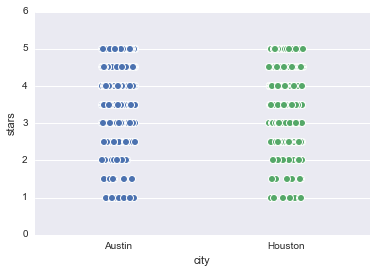

In [77]:
sns.stripplot(x="city", y="stars", data=texas_bus, jitter=True)
#sns.plt.ylim(0,200)
#sns.stripplot(x="city", y="review_count", data=texas_bus, jitter=True)
#sns.boxplot(x="city", y="review_count", data=texas_bus)

In [72]:
#texas_bus[texas_bus.categories]
type(texas_bus.categories)
texas_bus[texas_bus.categories.isnull]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [61]:
cat1,cat2,cat3 = [],[],[]
for cat in texas_bus['categories']:
    if cat[0] != None:
        print cat[0]
    else:
        print 'NULLLLL'
cat1
    #df = pd.DataFrame([cat1,cat2,cat3]).T
    #return df

Food
Food
Sandwiches
Professional Services
Food Stands
Cards & Stationery
Food
Home Services
Delis
Food
Bars
Post Offices
Religious Organizations
Hair Salons
Colleges & Universities
Hospitals
Bars
Hotels & Travel
Day Spas
Sporting Goods
Car Wash
Food
Women's Clothing
Active Life
Italian
Korean
Delis
Colleges & Universities
Bars
Real Estate Agents
Bars
Food
Tattoo
Auto Repair
Auto Repair
Cajun/Creole
Day Spas
Print Media
Cafes
Nightlife
Veterinarians


IndexError: list index out of range

In [27]:
def get_categories(dataf):
    cat1,cat2,cat3 = [],[],[]
    for cat in dataf['categories']:
        if not cat:
            cat1.append('')
            cat2.append('')
            cat3.append('')
        elif len(cat) < 2:
            cat1.append(cat[0])
        elif len(cat) < 3:
            cat1.append(cat[0])
            cat2.append(cat[1])
        else:
            cat1.append(cat[0])
            cat2.append(cat[1])
            cat3.append(cat[2])
    
    df = pd.DataFrame([cat1,cat2,cat3]).T
    return df

#yelp = pd.merge(yelp, df, left_index=True, right_index=True)
#yelp.rename(columns = {0:'cat1', 1:'cat2', 2:'cat3'}, inplace=True)

In [29]:
df1 = get_categories(texas_bus)
texas_bus = pd.merge(texas_bus, df1, left_index=True, right_index=True)
texas_bus.rename(columns = {0:'cat1', 1:'cat2', 2:'cat3'}, inplace=True)

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,photo_url,review_count,schools,stars,state,type,url,cat1,cat2,cat3
4,DARh6yjrGGVZ7R3Gdh4CMA,"[Food, Coffee & Tea]",Austin,2803 San Jacinto Blvd\nUniversity of Texas\nAu...,30.290495,-97.734496,JP's Java,[University of Texas],True,http://s3-media1.ak.yelpcdn.com/bphoto/7Iv_opb...,85,[University of Texas - Austin],3.5,TX,business,http://www.yelp.com/biz/jps-java-austin,Food Stands,Japanese,Lounges
9,L5ABFgTmN-T-uZjuGpoi3Q,"[Food, Specialty Food, Health Markets]",Houston,"5829 Kirby Dr\nWest University\nHouston, TX 77005",29.719274,-95.418110,Vitamin Shoppe,[West University],True,http://s3-media3.ak.yelpcdn.com/bphoto/ByAD70N...,2,[Rice University],5.0,TX,business,http://www.yelp.com/biz/vitamin-shoppe-houston-3,Food,Convenience Stores,Restaurants
17,8q_fyg8fkMeVx69jDhJ7jw,"[Sandwiches, Restaurants]",Houston,2401 W Holcombe Blvd\nWest University\nHouston...,29.706108,-95.414785,Jimmy John's,"[West University, Braeswood Place]",True,http://s3-media3.ak.yelpcdn.com/bphoto/SzzogZP...,23,[Rice University],4.0,TX,business,http://www.yelp.com/biz/jimmy-johns-houston-3,Hotels & Travel,Bikes,Shopping
32,U-S4SIklb8vc4fLkoVPTCA,"[Professional Services, Lawyers]",Houston,"2020 Southwest Fwy\nMuseum District\nHouston, ...",29.731445,-95.410316,"Sullo & Sullo, LLP",[Museum District],True,http://s3-media2.ak.yelpcdn.com/bphoto/Lk9zXjz...,7,[Rice University],3.0,TX,business,http://www.yelp.com/biz/sullo-and-sullo-llp-ho...,Tattoo,Restaurants,Health Markets
82,8SqxzaPVVBTIxrbJKZwDxg,"[Food Stands, Japanese, Restaurants]",Austin,"2906 Fruth St\nUniversity of Texas\nAustin, TX...",30.295368,-97.742054,Love Balls,[University of Texas],True,http://s3-media4.ak.yelpcdn.com/bphoto/MmfyATH...,96,[University of Texas - Austin],4.0,TX,business,http://www.yelp.com/biz/love-balls-austin,Hotels & Travel,Gluten-Free,Beauty and Spas
88,dP-icsN34lMu6zo9A--1SA,"[Cards & Stationery, Arts & Crafts, Flowers & ...",Houston,"2551 Amherst Dr\nWest University\nHouston, TX ...",29.715773,-95.417522,Papyrus,[West University],True,http://s3-media1.ak.yelpcdn.com/bphoto/cPt9gJr...,3,[Rice University],4.5,TX,business,http://www.yelp.com/biz/papyrus-houston-2,Pizza,Home Services,Medical Spas
98,oMWoEXLdPEn5HKyQR4-Ssg,"[Food, Street Vendors]",Austin,610 W Martin Luther King Jr Blvd\nWest Campus\...,30.282815,-97.744746,Moses Falafel,"[West Campus, University of Texas]",True,http://s3-media1.ak.yelpcdn.com/bphoto/2gZvEZl...,18,[University of Texas - Austin],4.5,TX,business,http://www.yelp.com/biz/moses-falafel-austin,Hair Salons,Japanese,Restaurants
144,qLSAFVz8MdF8GJ5UGtg_mg,"[Home Services, Real Estate, Apartments]",Austin,"2815 Guadalupe St\nWest Campus\nAustin, TX 78705",30.294209,-97.742060,The Venue On Guadalupe,"[West Campus, University of Texas]",True,http://s3-media3.ak.yelpcdn.com/bphoto/TB4stU8...,6,[University of Texas - Austin],3.0,TX,business,http://www.yelp.com/biz/the-venue-on-guadalupe...,Bars,Fashion,Family Practice
160,khdkBG4SetzbtvkGZpyGTQ,"[Delis, Restaurants]",Austin,500 W Martin Luther King Jr Bl\nSte A\nWest Ca...,30.282209,-97.743378,Subway,"[West Campus, University of Texas]",True,http://s3-media1.ak.yelpcdn.com/assets/2/www/i...,2,[University of Texas - Austin],3.0,TX,business,http://www.yelp.com/biz/subway-austin-35,Optometrists,Sports Bars,Shopping
166,4Mxc95eqsqvrMXJOSp51bw,"[Food, Convenience Stores]",Houston,"1717 Dryden Rd\nWest University\nHouston, TX 7...",29.710058,-95.401663,Newsbox Etc,"[West University, Medical Center]",True,http://s3-media1.ak.yelpcdn.com/assets/2/www/i...,2,[Rice University],2.5,TX,business,http://www.yelp.com/biz/newsbox-etc-houston,Food Stands,Public Services & Government,Bowling


In [43]:
#texas_bus.groupby('city').stars.mean()
#texas_bus.groupby('cat1').stars.mean()
texas_bus.groupby('city').cat1.value_counts()
texas_bus.groupby('city').review_count.mean()
texas_bus.groupby('cat1').review_count.mean()
#texas_bus.cat2.value_counts()
#texas_bus.cat3.value_counts()

cat1
Active Life                          21.500
Arts & Entertainment                 10.000
Barbers                               3.500
Bars                                  5.500
Beauty and Spas                       8.000
Books, Mags, Music and Video         19.000
Breakfast & Brunch                    2.000
Cafes                                 2.000
Cards & Stationery                    7.000
Chinese                               2.000
Delis                                24.000
Doctors                               2.000
Fashion                              11.000
Festivals                            38.000
Flowers & Gifts                       6.000
Food                                 20.875
Food Delivery Services               15.000
Food Stands                          43.500
Greek                                18.000
Hair Salons                          10.000
Home Services                        12.500
Hotels & Travel                      59.500
Landmarks & Historical Buil

In [24]:
texas_bus.columns.values

array([u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'photo_url', u'review_count', u'schools', u'stars', u'state',
       u'type', u'url'], dtype=object)

In [19]:
texas.city.unique()
texas.groupby('city').stars_business.mean()

city
Austin                   3.745776
Houston                  3.732102
Liberty Hill             3.000000
West University Place    4.500000
Name: stars_business, dtype: float64

In [34]:
len(yelp[yelp.state.isin(['TX', 'NY'])].user_id.unique())
#len(yelp[yelp.state == 'NY'].user_id.unique())

20017

In [9]:
yelp.columns.values
#average_stars = averages stars given by that particular user
#stars_business =  #of stars a business received
#stars_review = # of stars given for that particular review
#type_review, type and type_business = drop this column, brings no useful information to the table

array([u'business_id', u'date', u'review_id', u'stars_review', u'text',
       u'user_id', 'review_votes', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', 'business_name', u'neighborhoods',
       u'open', u'photo_url', 'business_review_cnt', u'schools',
       u'stars_business', u'state', 'business_url', u'average_stars',
       'reviewer_name', 'user_review_cnt', u'type', 'user_url',
       'user_votes', 'review_votes_funny', 'review_votes_useful',
       'review_votes_cool', 'user_votes_funny', 'user_votes_useful',
       'user_votes_cool'], dtype=object)

## Funny, useful and cool votes from a users review
## stars_business vs. review_votes_funny, useful, cool
#### Is there a relationship between the number of funny, useful or cool votes that a review receives and the average number of stars for a particular business?

/Users/samsisto/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


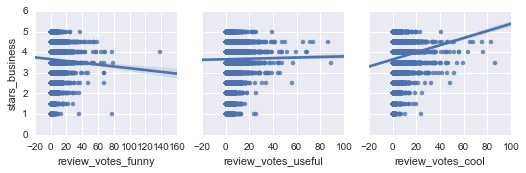

In [12]:
#review_votes_funny, review_votes_useful, review_votes_cool

feature_cols = ['review_votes_funny', 'review_votes_useful', 'review_votes_cool']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars_business', kind='reg')

Contrary to the findings that we had in the Yelp homework that we did for class, it actually looks like there is a negative trend between "funny" votes and the number of stars that a business receives. Whereas we see a positive trend for "useful" and "cool" reviews and number of stars that a business receives.

In [13]:
#Assembling the linear regression model

X = yelp[feature_cols]
y = yelp.stars_business

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)

[('review_votes_funny', -0.03739450415204127),
 ('review_votes_useful', -0.034568964189588471),
 ('review_votes_cool', 0.080301686131831071)]

In [20]:
#Compute RMSE with training and testing data sets

X = yelp[feature_cols]
y = yelp.stars_business

#train/test split?
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    
#create a model; fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
#return the error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.6287592823689504

## User data frame exploration

In [9]:
funny3,useful3,cool3 = [],[],[]
for votes in users['votes']:
    funny3.append(votes[u'funny'])
    useful3.append(votes[u'useful'])
    cool3.append(votes[u'cool'])

df3 = pd.DataFrame([funny3,useful3,cool3]).T
users = pd.merge(users, df3, left_index=True, right_index=True)
users.rename(columns = {0:'funny', 1:'useful', 2:'cool'}, inplace=True)

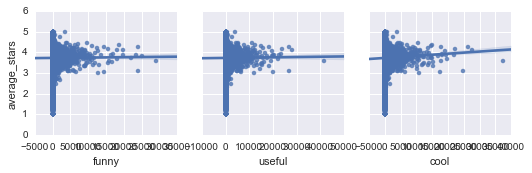

In [13]:
feature_cols = ['funny', 'useful', 'cool']
sns.pairplot(users, x_vars=feature_cols, y_vars='average_stars', kind='reg')

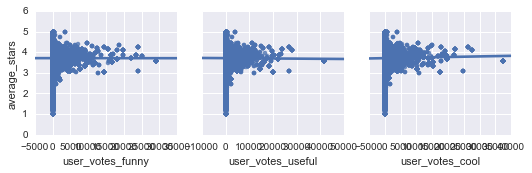

In [53]:
#user_votes_funny, user_votes_useful, user_votes_cool

feature_cols = ['user_votes_funny', 'user_votes_useful', 'user_votes_cool']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='average_stars', kind='reg')

In [14]:
users.columns.values

array([u'average_stars', u'name', u'review_count', u'type', u'url',
       u'user_id', u'votes', 'funny', 'useful', 'cool'], dtype=object)

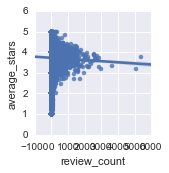

In [15]:
sns.pairplot(users, x_vars='review_count', y_vars='average_stars', kind='reg')
#As review count increases, average star rating decreases

## Business data frame exploration

In [16]:
business.columns.values

array([u'business_id', u'categories', u'city', u'full_address',
       u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'photo_url', u'review_count', u'schools', u'stars', u'state',
       u'type', u'url'], dtype=object)

In [32]:
#business.groupby('city').stars.mean()

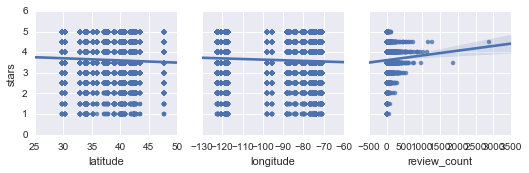

In [38]:
feat_cols = ['latitude', 'longitude', 'review_count']
sns.pairplot(business, x_vars=feat_cols, y_vars='stars', kind='reg')
#higher review count leads to higher average star rating for a business

In [37]:
business.neighborhoods

0                                     [South East LA]
1                                    [Harvard Square]
2                                                  []
3                                                  []
4                               [University of Texas]
5                                           [Midtown]
6                                                  []
7                                                  []
8                                   [University City]
9                                   [West University]
10                                         [Back Bay]
11                                                 []
12                                         [Pasadena]
13                                                 []
14                                           [Mantua]
15                                                 []
16                                                 []
17                 [West University, Braeswood Place]
18                          

## Reviews data frame exploration

In [42]:
reviews.columns.values

array([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'votes', 'funny', 'useful', 'cool'], dtype=object)

In [41]:
funny3,useful3,cool3 = [],[],[]
for votes in reviews['votes']:
    funny3.append(votes[u'funny'])
    useful3.append(votes[u'useful'])
    cool3.append(votes[u'cool'])

df3 = pd.DataFrame([funny3,useful3,cool3]).T
reviews = pd.merge(reviews, df3, left_index=True, right_index=True)
reviews.rename(columns = {0:'funny', 1:'useful', 2:'cool'}, inplace=True)

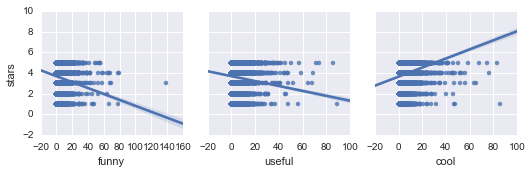

In [43]:
feat_cols = ['funny', 'useful', 'cool']
sns.pairplot(reviews, x_vars=feat_cols, y_vars='stars', kind='reg')

In [ ]:
## Categories

In [26]:
#categories
#breaking out a list here to see different category ratings

#sns.barplot(x='stars_business', y='categories', data=yelp)
yelp.categories[0]

[u'Food', u'Ice Cream & Frozen Yogurt']

In [18]:
cat1,cat2,cat3 = [],[],[]
for cat in yelp['categories']:
    if not cat:
        cat1.append('')
        cat2.append('')
        cat3.append('')
    elif len(cat) < 2:
        cat1.append(cat[0])
    elif len(cat) < 3:
        cat1.append(cat[0])
        cat2.append(cat[1])
    else:
        cat1.append(cat[0])
        cat2.append(cat[1])
        cat3.append(cat[2])
    
df = pd.DataFrame([cat1,cat2,cat3]).T
yelp = pd.merge(yelp, df, left_index=True, right_index=True)
yelp.rename(columns = {0:'cat1', 1:'cat2', 2:'cat3'}, inplace=True)

,0,1,2
0,Food,Ice Cream & Frozen Yogurt,Restaurants
1,Sushi Bars,Japanese,Breweries
2,Food,Ice Cream & Frozen Yogurt,Japanese
3,Bars,Food,Sports Bars
4,Bars,Sushi Bars,Event Planning & Services
5,Nail Salons,Beauty and Spas,Arts & Entertainment
6,Pubs,Bars,Obstetricians and Gynecologists
7,Delis,Restaurants,Restaurants
8,Food,Ice Cream & Frozen Yogurt,Breweries
9,Bars,Music Venues,Restaurants


In [26]:
yelp.groupby('cat1').stars_business.mean()

cat1
                                3.192990
Accountants                     4.266667
Active Life                     4.008068
Acupuncture                     4.680952
Adult Entertainment             3.198276
Afghan                          3.133484
African                         3.883523
Allergists                      4.343750
American (New)                  3.698806
American (Traditional)          3.630370
Animal Shelters                 4.087838
Antiques                        5.000000
Appliances                      5.000000
Art Schools                     4.062500
Art Supplies                    3.713864
Arts & Crafts                   3.837957
Arts & Entertainment            4.021699
Asian Fusion                    3.437220
Auto Repair                     3.899135
Automotive                      3.590538
Baby Gear & Furniture           3.480769
Bakeries                        3.732843
Banks & Credit Unions           3.011655
Barbeque                        3.745533
Barbers    

## Text

In [39]:
#text
#bag of words approach here?

yelp.text

0         I'm a fan of soft serve ice cream and Guptill'...
1         Based on the positive reviews here, my fiance ...
2         A few days ago, my girlfriends took me here. T...
3         I'm not really a beer drinker. And when I am, ...
4         My dreams of neverending sushi have finally be...
5         I really, really, really hate to renege what I...
6         Such a fantastic, hidden away little gem of a ...
7         Call me un-American, or maybe just un-Eastern ...
8         I've been to Guptill's twice. The first time I...
9         Hands down my favorite place to see bands in t...
10        I've been a patient of this office for a littl...
11        While I lived in Boston for 4 years, this was ...
12        We've been back to Browns several times since ...
13        we ordered plain cheese and a smoked mozzerell...
14        Two years ago we ate at the Dinosaur in Syracu...
15        I recently got a tip from All Over Albany that...
16        Stepping into famous lunch is 

## Web scraping to get additional user information

In [8]:
url1 = users.url[2]
url1

u'http://www.yelp.com/user_details?userid=cMgGj2FXHEbzdNZdLN_EwA'

In [9]:

print b.prettify()

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script type="text/javascript">
   window.yPageStart = new Date().getTime();
  </script>
  <script type="text/javascript">
   var initialVisibilityState = document.webkitVisibilityState;

                yPerfTimings = [];

                    ySitRepParams = {"clientIP": "98.218.23.83", "datacenter": "iad1", "action": null, "uniqueRequestID": "2e4c9f08dcc0

In [88]:
b.find('h4', text='Rating Distribution')
new_list

[<h4>Rating Distribution</h4>,
 <h4>Review Votes</h4>,
 <h4>Stats</h4>,
 <h4>4 Compliments</h4>,
 <h4>Location</h4>,
 <h4>Yelping Since</h4>,
 <h4>Things I Love</h4>,
 <h4>Find Me In</h4>,
 <h4>My Hometown</h4>,
 <h4>When I'm Not Yelping...</h4>,
 <h4>Why You Should Read My Reviews</h4>,
 <h4>The Last Great Book I Read</h4>,
 <h4>My First Concert</h4>,
 <h4>My Favorite Movie</h4>,
 <h4>My Last Meal On Earth</h4>,
 <h4>Don't Tell Anyone Else But...</h4>,
 <h4>Most Recent Discovery</h4>,
 <h4>Current Crush</h4>]

In [29]:
url_list = users.url[2]
url_list

u'http://www.yelp.com/user_details?userid=cMgGj2FXHEbzdNZdLN_EwA'

In [32]:
users.head()

,average_stars,name,review_count,type,url,user_id,votes
0,3.225806,LiiLii C.,31,user,http://www.yelp.com/user_details?userid=JkeCKy...,JkeCKyEaQlbLd9uZYl4DjA,"{u'funny': 15, u'useful': 48, u'cool': 18}"
1,3.000000,Jan Ellen T.,4,user,http://www.yelp.com/user_details?userid=cs91PA...,cs91PAsv6esdWAaSkzm2lg,"{u'funny': 0, u'useful': 2, u'cool': 0}"
2,3.606061,Saki U.,33,user,http://www.yelp.com/user_details?userid=cMgGj2...,cMgGj2FXHEbzdNZdLN_EwA,"{u'funny': 8, u'useful': 19, u'cool': 10}"
3,3.303030,stephanie h.,33,user,http://www.yelp.com/user_details?userid=KXJbnH...,KXJbnHT4PDS1JZNCFKdmMg,"{u'funny': 61, u'useful': 119, u'cool': 78}"
4,4.038462,Theodore J.,78,user,http://www.yelp.com/user_details?userid=Tpmvuf...,Tpmvufw1eea1DrjLAY2jLg,"{u'funny': 45, u'useful': 74, u'cool': 30}"


In [46]:
users2 = users.iloc[:,4:6]
users2
new_dict = users2.set_index('user_id')['url'].to_dict()
new_dict

{u'g1L7Qnf3BOjDFEJXZP14SQ': u'http://www.yelp.com/user_details?userid=g1L7Qnf3BOjDFEJXZP14SQ',
 u'CtXKeKjhT_SQVtgrvn8adQ': u'http://www.yelp.com/user_details?userid=CtXKeKjhT_SQVtgrvn8adQ',
 u'kA6ZU5cWtNXbknE5wP41Hw': u'http://www.yelp.com/user_details?userid=kA6ZU5cWtNXbknE5wP41Hw',
 u'XqlitoOA--VapKJKB1dyMA': u'http://www.yelp.com/user_details?userid=XqlitoOA--VapKJKB1dyMA',
 u'QUojhXZh2XNjdBGMaRf7_g': u'http://www.yelp.com/user_details?userid=QUojhXZh2XNjdBGMaRf7_g',
 u'wEug7SckQ4qdfTKXcs5L-w': u'http://www.yelp.com/user_details?userid=wEug7SckQ4qdfTKXcs5L-w',
 u'ey5NAjyxbPERByAneDXWKQ': u'http://www.yelp.com/user_details?userid=ey5NAjyxbPERByAneDXWKQ',
 u'SW0dvVpwuKAuDBRMPPRtPA': u'http://www.yelp.com/user_details?userid=SW0dvVpwuKAuDBRMPPRtPA',
 u'OIfaWqRX3ymIV4mmkbMlZg': u'http://www.yelp.com/user_details?userid=OIfaWqRX3ymIV4mmkbMlZg',
 u'O4tbaUAItvwbSDyJkPR6vQ': u'http://www.yelp.com/user_details?userid=O4tbaUAItvwbSDyJkPR6vQ',
 u'3MKBPOJGCEO6lL7wt_UbVQ': u'http://www.yelp.com/

In [8]:
users2 = users.iloc[:,4:6]
users2
new_dict = users2.set_index('user_id')['url'].to_dict()
new_dict

newest_dict = { key:value for key, value in new_dict.items() }
newest_dict
len(newest_dict)


130873

In [ ]:
users2 = users.iloc[:,4:6]
new_dict = users2.set_index('user_id')['url'].to_dict()

newest_dict = { key:value for key, value in new_dict.items() }

#r = requests.get(url1)
#b = BeautifulSoup(r.text, 'html.parser')

def get_header_text(b):
    new_list = b.html.find_all("h4")
    list_guy = []
    for item in new_list:
        list_guy.append(item.getText())
    return list_guy

def get_user_info(list):
    user_info = {}
    for i in list:
        header = b.find('h4', text=i)
        for item in header.next_siblings:
            if item != '\n': 
                user_info[i] = item.string
    return user_info


user_info = {}
for item in newest_dict:
    #time.sleep(5)
    r = requests.get(newest_dict[item])
    b = BeautifulSoup(r.text, 'html.parser')
    
    header_text = []
    
    header_text = get_header_text(b)
    user_info[item] = get_user_info(header_text)
    
    print user_info

{u'g1L7Qnf3BOjDFEJXZP14SQ': {u'Rating Distribution': u'\n                        View more graphs \xbb\n                    ', u'Yelping Since': u'November 2011', u'Location': u'Seattle, WA', u'Review Votes': None}}
{u'g1L7Qnf3BOjDFEJXZP14SQ': {u'Rating Distribution': u'\n                        View more graphs \xbb\n                    ', u'Yelping Since': u'November 2011', u'Location': u'Seattle, WA', u'Review Votes': None}, u'CtXKeKjhT_SQVtgrvn8adQ': {u'Yelping Since': u'September 2008', u'12 Compliments': None, u'My Hometown': u'Middlebury, VT', u'My Blog Or Website': u'scheuguy.tumblr.com', u'Location': u'Boston, MA', u"Don't Tell Anyone Else But...": u'I\'m the #2 result on Google for "personal humiliation"'}}
{u'g1L7Qnf3BOjDFEJXZP14SQ': {u'Rating Distribution': u'\n                        View more graphs \xbb\n                    ', u'Yelping Since': u'November 2011', u'Location': u'Seattle, WA', u'Review Votes': None}, u'CtXKeKjhT_SQVtgrvn8adQ': {u'Yelping Since': u'September

In [16]:
user_info_df = pd.DataFrame(user_info)
user_info_df

{u'g1L7Qnf3BOjDFEJXZP14SQ': {u'Rating Distribution': u'\n                        View more graphs \xbb\n                    ', u'Yelping Since': u'November 2011', u'Location': u'Seattle, WA', u'Review Votes': None}, u'QUojhXZh2XNjdBGMaRf7_g': {u'Yelping Since': u'June 2011', u'Stats': None, u'Location': u'Newport Beach, CA', u'Review Votes': None}}


In [19]:
file_name = '/Users/samsisto/Desktop/user_info.csv'
user_info_df.to_csv(file_name, encoding='utf-8')

In [70]:
b.html.find_all("h4")


[<h4>Rating Distribution</h4>,
 <h4>Review Votes</h4>,
 <h4>Stats</h4>,
 <h4>4 Compliments</h4>,
 <h4>Location</h4>,
 <h4>Yelping Since</h4>,
 <h4>Things I Love</h4>,
 <h4>Find Me In</h4>,
 <h4>My Hometown</h4>,
 <h4>When I'm Not Yelping...</h4>,
 <h4>Why You Should Read My Reviews</h4>,
 <h4>The Last Great Book I Read</h4>,
 <h4>My First Concert</h4>,
 <h4>My Favorite Movie</h4>,
 <h4>My Last Meal On Earth</h4>,
 <h4>Don't Tell Anyone Else But...</h4>,
 <h4>Most Recent Discovery</h4>,
 <h4>Current Crush</h4>]